# **1.Import Libraries**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
pizza_df=pd.read_csv('/content/drive/MyDrive/Python Projects/Pizza Price Prediction/pizza_v2.csv')

# **2.First 5 Rows**

In [4]:
pizza_df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


# **3.Shape of the Data Set**

In [5]:
pizza_df.shape

(129, 9)

In [6]:
print("Number of Rows is",pizza_df.shape[0])
print("Number of Columns is",pizza_df.shape[1])

Number of Rows is 129
Number of Columns is 9



# 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement **bold text**

In [7]:
pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


# 5.Check Null Values In The Dataset **bold text**

In [8]:
pizza_df.isnull().sum()

,0
company,0
price_rupiah,0
diameter,0
topping,0
variant,0
size,0
extra_sauce,0
extra_cheese,0
extra_mushrooms,0



# **6. Data Preprocessing**

In [9]:
pizza_df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [10]:
#rename the 'price_rupiah' column
pizza_df.rename(columns={'price_rupiah':'price'},inplace=True)

In [11]:
#replace the Rp and , in the price column
pizza_df['price']=pizza_df['price'].str.replace('Rp','')
pizza_df['price']=pizza_df["price"].str.replace(',',"").astype('int')
pizza_df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,198000,20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000,16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000,14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000,18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [12]:
#converting the price column to kes. where 1Rp=1.53
pizza_df['price']=round(pizza_df['price']/1.53,0)
pizza_df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,153595.0,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,129412.0,20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,78431.0,16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,101307.0,14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,162092.0,18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [13]:
#removing nch name from the diameter
pizza_df['diameter']=pizza_df['diameter'].str.replace(' inch','').astype('float')
pizza_df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,153595.0,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,129412.0,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,78431.0,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,101307.0,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,162092.0,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [14]:
pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          129 non-null    object 
 1   price            129 non-null    float64
 2   diameter         129 non-null    float64
 3   topping          129 non-null    object 
 4   variant          129 non-null    object 
 5   size             129 non-null    object 
 6   extra_sauce      129 non-null    object 
 7   extra_cheese     129 non-null    object 
 8   extra_mushrooms  129 non-null    object 
dtypes: float64(2), object(7)
memory usage: 9.2+ KB


## **Data Analysis**

# **8. What is Univariate Analysis**

# Company

In [15]:
pizza_df['company'].value_counts()

,count
company,
C,30
E,30
A,25
B,24
D,20


# Price

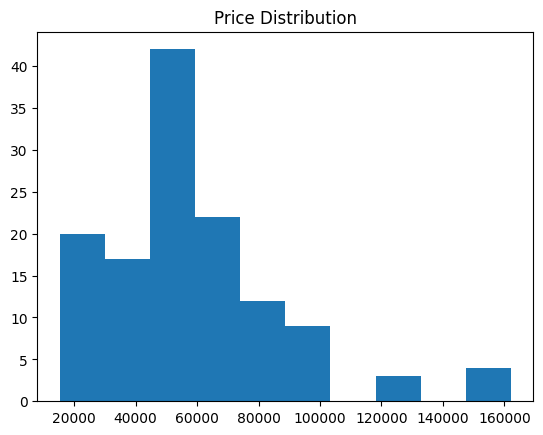

In [16]:
import matplotlib.pyplot as plt
plt.hist(x="price",data=pizza_df)
plt.title("Price Distribution")
plt.show()

# Diameter

In [17]:
pizza_df['diameter'].value_counts()

,count
diameter,
12.0,49
14.0,24
8.5,22
17.0,10
18.5,6
16.0,5
8.0,4
16.5,4
22.0,3


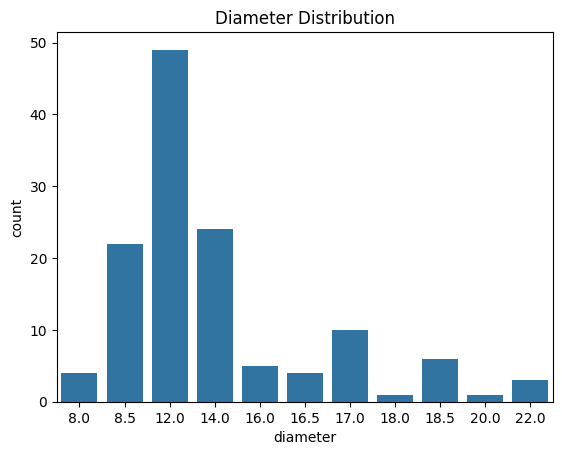

In [18]:
#plotting diameter univariate analysis
import seaborn as sns
sns.countplot(x="diameter",data=pizza_df)
plt.title("Diameter Distribution")
plt.show()

# Topping

In [19]:
pizza_df['topping'].value_counts()

,count
topping,
chicken,29
mushrooms,22
mozzarella,21
smoked_beef,19
tuna,9
vegetables,9
meat,8
black_papper,3
sausage,3


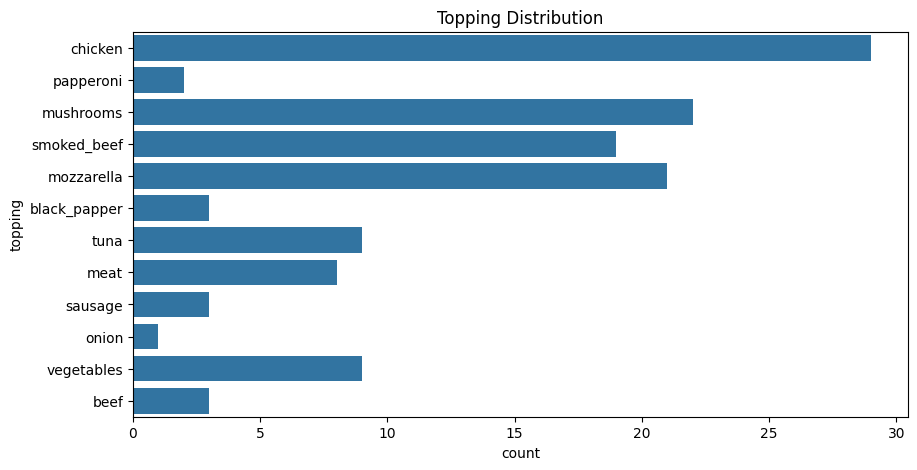

In [20]:
#plotting a horinzontal bar chart for topping univariate analysis
plt.figure(figsize=(10,5))
import seaborn as sns
sns.countplot(y = pizza_df['topping'])
plt.title("Topping Distribution")
plt.show()


# Variant

In [21]:
pizza_df['variant'].value_counts()

,count
variant,
classic,30
meat_lovers,10
double_mix,10
crunchy,10
new_york,10
double_decker,9
double_signature,5
american_favorite,5
BBQ_meat_fiesta,5


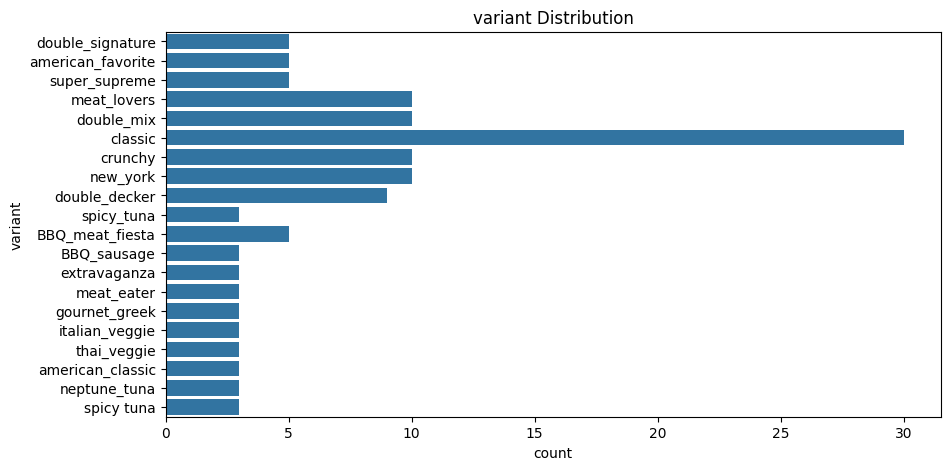

In [22]:
#plotting a horinzontal bar chart for variant univariate analysis
plt.figure(figsize=(10,5))
import seaborn as sns
sns.countplot(y = pizza_df['variant'])
plt.title("variant Distribution")
plt.show()

# Size

In [23]:
pizza_df['size'].value_counts()

,count
size,
medium,41
small,22
large,21
reguler,20
jumbo,15
XL,10


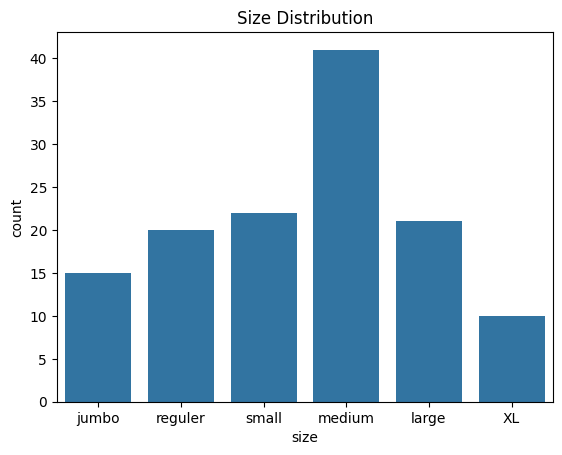

In [24]:
#plotting size univariate analysis
import seaborn as sns
sns.countplot(x="size",data=pizza_df)
plt.title("Size Distribution")
plt.show()

# Extra Sauce

In [25]:
pizza_df['extra_sauce'].value_counts()

,count
extra_sauce,
yes,76
no,53


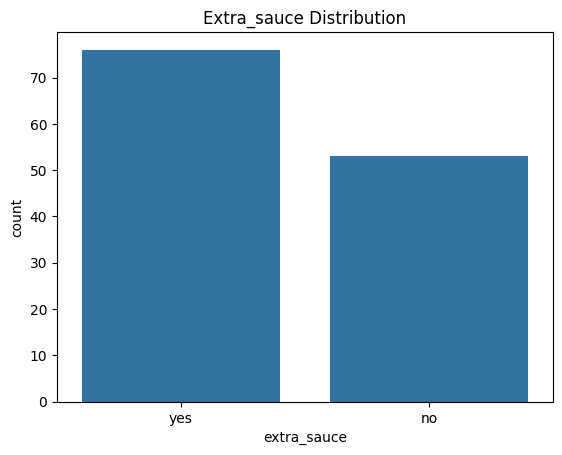

In [26]:
#plotting Extra_sauce univariate analysis
import seaborn as sns
sns.countplot(x="extra_sauce",data=pizza_df)
plt.title("Extra_sauce Distribution")
plt.show()

# Extra Cheese

In [27]:
pizza_df['extra_cheese'].value_counts()

,count
extra_cheese,
yes,86
no,43


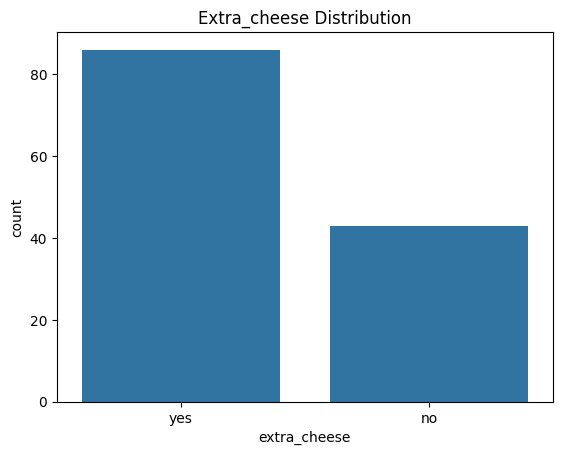

In [28]:
#plotting Extra_cheese univariate analysis
import seaborn as sns
sns.countplot(x="extra_cheese",data=pizza_df)
plt.title("Extra_cheese Distribution")
plt.show()

# **9. Bivariate Analysis**

# Price by Company

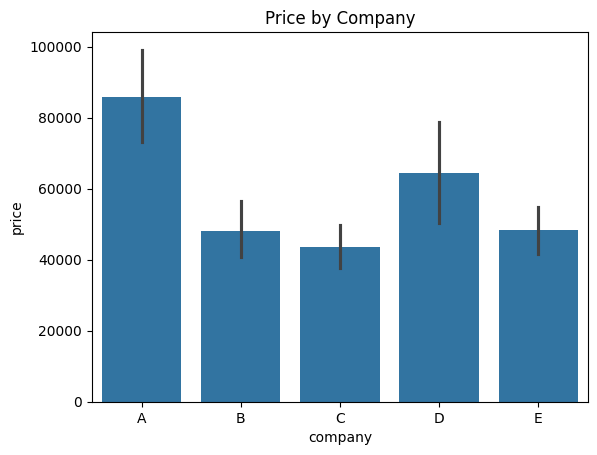

In [29]:
sns.barplot(x=pizza_df['company'],y=pizza_df['price'])
plt.title("Price by Company")
plt.show()

# Price by topping

<Axes: xlabel='price', ylabel='topping'>

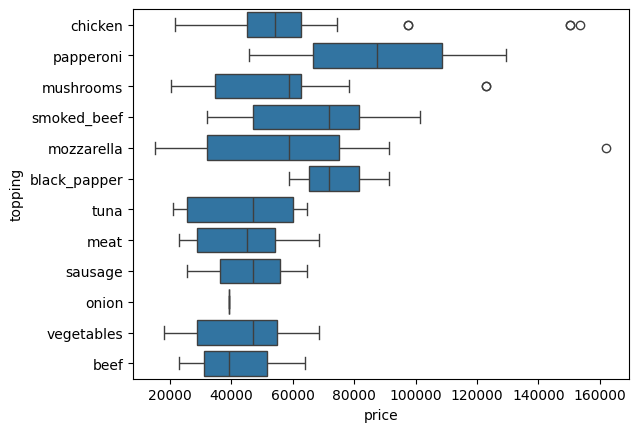

In [30]:
sns.boxplot(y='topping',x='price',data=pizza_df)

# Price by size

<Axes: xlabel='size', ylabel='price'>

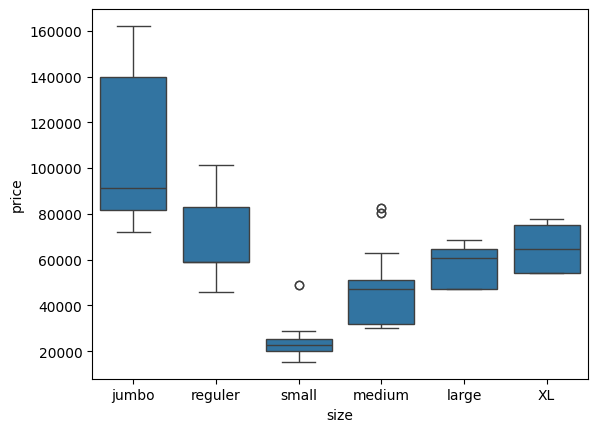

In [31]:

sns.boxplot(x='size',y='price',data=pizza_df)

# **10. Find the most expensive pizza**

In [32]:
#most expensive pizza
pizza_df[pizza_df['price'].max()==pizza_df['price']]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
4,A,162092.0,18.0,mozzarella,double_signature,jumbo,yes,no,yes


# **11.Find diameters of jumbo size pizza**

In [33]:
pizza_df[pizza_df['size']=='jumbo']['diameter'].head()

,diameter
0,22.0
1,20.0
4,18.0
5,18.5
6,16.0


# **12. Find diameters of XL size pizza**

In [34]:
pizza_df[pizza_df['size']=='XL']['diameter'].head()

,diameter
29,17.0
35,17.0
41,17.0
47,17.0
93,17.0



# **13.Remove outliers in the jumbo size pizzas**

In [35]:
pizza_df[(pizza_df['size']=='jumbo') & (pizza_df['diameter']<=16)]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
6,A,71895.0,16.0,smoked_beef,american_favorite,jumbo,no,yes,yes
11,A,71895.0,16.0,black_papper,super_supreme,jumbo,yes,yes,no
16,A,71895.0,16.0,smoked_beef,meat_lovers,jumbo,no,yes,yes
80,D,71895.0,16.0,smoked_beef,meat_lovers,jumbo,no,yes,no


# **14. Label Encoding**
Encoding the categorical columns since machine learning projects can only work with numerical values

In [36]:
cat_cols=pizza_df.select_dtypes(include=['object']).columns
cat_cols

Index(['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese',
       'extra_mushrooms'],
      dtype='object')

In [37]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for col in cat_cols:
  pizza_df[col]=encoder.fit_transform(pizza_df[col])

In [38]:
pizza_df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,153595.0,22.0,2,8,1,1,1,0
1,0,129412.0,20.0,7,8,1,1,1,0
2,0,78431.0,16.0,5,8,4,1,1,1
3,0,101307.0,14.0,9,8,4,1,0,1
4,0,162092.0,18.0,4,8,1,1,0,1


# **15. Create the Feature Matrix X and Response(Target) Vector y**

In [39]:
X=pizza_df.drop('price',axis=1)
y=pizza_df['price']

# **16.Split the data into Train and Test sets**

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# **17.Building the Models**

In [41]:
#importing the models
from sklearn.linear_model import LinearRegression
from  sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# **18. Training the models**

In [42]:
LR = LinearRegression()
LR.fit(X_train,y_train)

SVMR  = SVR()
SVMR.fit(X_train,y_train)

RF = RandomForestRegressor()
RF.fit(X_train,y_train)

GBR = GradientBoostingRegressor()
GBR.fit(X_train,y_train)

XG = XGBRegressor()
XG.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


# **19. Prediction on Test Data**

In [43]:
y_pred1 = LR.predict(X_test)
y_pred2 = SVMR.predict(X_test)
y_pred3 = RF.predict(X_test)
y_pred4 = GBR.predict(X_test)
y_pred5 = XG.predict(X_test)

# **20. Model Evaluation**

In [44]:
from sklearn import metrics

In [45]:
scoreLR = metrics.r2_score(y_test,y_pred1)
scoreSVMR = metrics.r2_score(y_test,y_pred2)
scoreRF = metrics.r2_score(y_test,y_pred3)
scoreGBR = metrics.r2_score(y_test,y_pred4)
scoreXG = metrics.r2_score(y_test,y_pred5)

In [46]:
#printing the scores
print(scoreLR ,scoreSVMR,scoreRF,scoreGBR,scoreXG)

0.7049660261962951 -0.0025180095043166872 0.8962645950706727 0.9305409850441921 0.7672795034979065


In [47]:
final_data = pd.DataFrame({'Models':['LR','SVR','RF','GB','XGR'],
             'R2_SCORE':[scoreLR,scoreSVMR,scoreRF,scoreGBR,scoreXG]})
final_data

,Models,R2_SCORE
0,LR,0.704966
1,SVR,-0.002518
2,RF,0.896265
3,GB,0.930541
4,XGR,0.767280


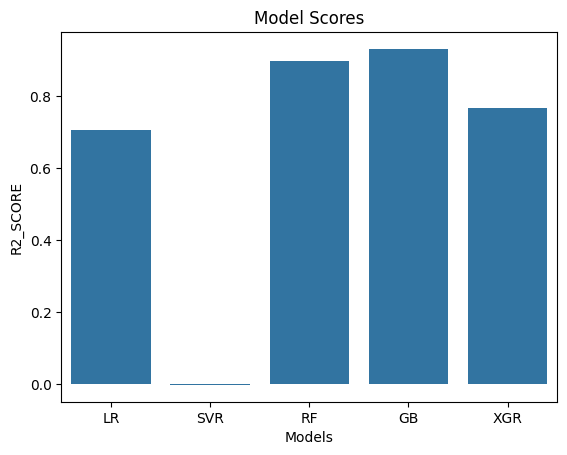

In [48]:
#plotting the model scores
import seaborn as sns
sns.barplot(x='Models',y='R2_SCORE',data=final_data)
plt.title("Model Scores")
plt.show()

# **21. Feature Importance**

# 21.a.  Random Forest

In [49]:
RF.feature_importances_

array([0.02303106, 0.63044286, 0.04488971, 0.10259984, 0.14280948,
       0.03142614, 0.01609113, 0.00870977])

In [50]:
fea1 = pd.Series(RF.feature_importances_,index=X_train.columns)

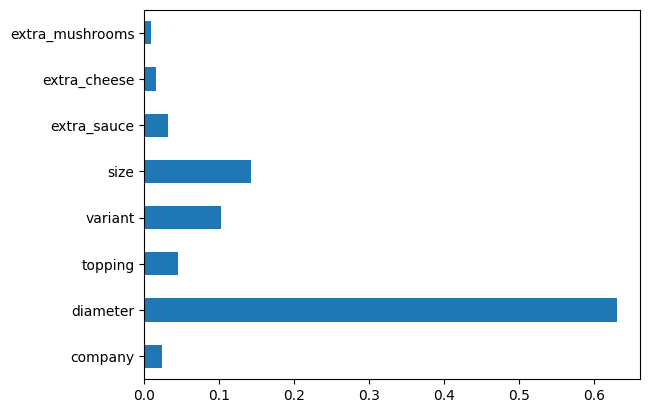

In [51]:
fea1.plot(kind='barh')
plt.show()

# 21.b.Gradient Boosting Regressor

In [52]:
GBR.feature_importances_

array([0.01338569, 0.67230696, 0.0420592 , 0.09394333, 0.12230372,
       0.04487521, 0.00888056, 0.00224532])

In [53]:
fea2 = pd.Series(GBR.feature_importances_,index=X_train.columns)

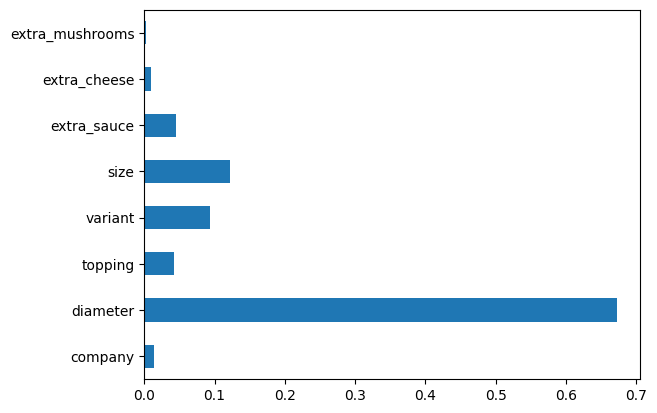

In [54]:
fea2.plot(kind='barh')
plt.show()

# 21.c. XGBRegressor

In [55]:
XG.feature_importances_

array([0.0049452 , 0.44662786, 0.0145801 , 0.08263158, 0.3423054 ,
       0.09125727, 0.01324601, 0.00440658], dtype=float32)

In [56]:
fea3=pd.Series(XG.feature_importances_,index=X_train.columns)

<Axes: >

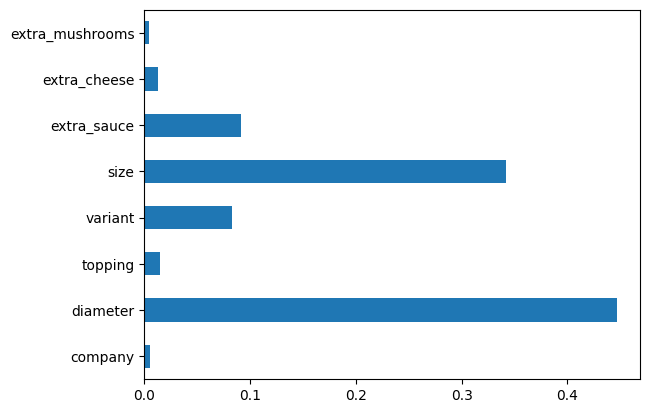

In [57]:
fea3.plot(kind='barh')

# **22. Saving The Best Model**

In [65]:
X = pizza_df.drop('price',axis=1)
y = pizza_df['price']

In [66]:

GBR.fit(X,y)

GradientBoostingRegressor()

In [67]:

import joblib

In [74]:
joblib.dump(GBR,'pizza_price_prediction')

['pizza_price_prediction']

In [71]:
model = joblib.load('pizza_price_prediction')

In [72]:
import pandas as pd
test_data = pd.DataFrame({
    'company':1,
    'diameter':22.0,
    'topping':2,
    'variant':8,
    'size':1,
    'extra_sauce':1,
    'extra_cheese':1,
    'extra_mushrooms':1
},index=[0])

In [73]:
model.predict(test_data)

array([151782.52998868])